<h4>Importing necessary libraries
</h4>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import re

In [4]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.svm import LinearSVC

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("text_emotions.csv")

In [13]:
df.head()

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<h4>Understanding the Dataset</h4>

In [15]:
df.shape


(20000, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [17]:
df.isnull().sum()

content      0
sentiment    0
dtype: int64

<h4>Analysis of Emotion Distribution</h4>

In [19]:
emotion_counts = df["sentiment"].value_counts()
emotion_counts

sentiment
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

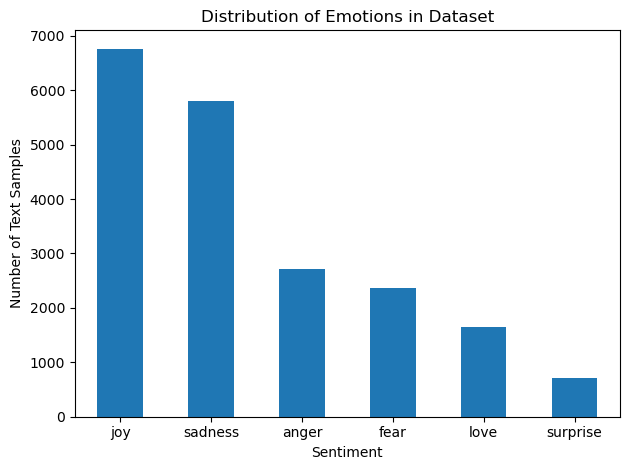

In [20]:
emotion_counts.plot(kind = "bar")
plt.title("Distribution of Emotions in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Text Samples")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [21]:
df["text_length"] = df["content"].apply(lambda x: (len(x.split())))
df["text_length"].describe()        

count    20000.000000
mean        19.135050
std         10.972016
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: text_length, dtype: float64

<h4>Data Preprocessing</h4>

In [115]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      
    text = re.sub(r"[^a-z\s]", "", text)    
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["content"].apply(clean_text)


<h4>Label Encoding</h4>

In [25]:
le = LabelEncoder()
df["emotion_encoded"] = le.fit_transform(df["sentiment"])

In [119]:
X = df["clean_text"]      
y = df["emotion_encoded"]    
pd.DataFrame({
    "Emotion": le.classes_,
    "Encoded Value": le.transform(le.classes_)
})



,Emotion,Encoded Value
0,anger,0
1,fear,1
2,joy,2
3,love,3
4,sadness,4
5,surprise,5


<h4>Train Test Split</h4>

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [129]:

print("Total samples:", len(X))


print("\nTrain-Test Split Details:")
print("Training samples:", len(X_train))
print("Testing samples :", len(X_test))


print("\nSplit Ratio:")
print(f"Training set: {len(X_train) / len(X) * 100:.2f}%")
print(f"Testing set : {len(X_test) / len(X) * 100:.2f}%")



Total samples: 20000

Train-Test Split Details:
Training samples: 16000
Testing samples : 4000

Split Ratio:
Training set: 80.00%
Testing set : 20.00%


<h4>Feature Extraction: TF-IDF Vectorization</h4>

In [30]:


tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [137]:
print("TF-IDF Feature Extraction Successful")
print("Train shape:", X_train_vec.shape)
print("Test shape :", X_test_vec.shape)
print("Features   :", X_train_vec.shape[1])


TF-IDF Feature Extraction Successful
Train shape: (16000, 5000)
Test shape : (4000, 5000)
Features   : 5000


<h4>Model Training</h4>

In [32]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [33]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

LinearSVC()

In [34]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

<h4>Model Evaluation</h4>

In [36]:
def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    
    print(f"\n{name} Results")
    print(f"Accuracy : {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))
    
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

In [37]:
results = []

results.append(evaluate(nb, X_test_vec, y_test, "Naive Bayes"))



Naive Bayes Results
Accuracy : 0.7535
              precision    recall  f1-score   support

       anger       0.92      0.58      0.71       542
        fear       0.92      0.47      0.62       475
         joy       0.70      0.97      0.82      1352
        love       0.99      0.22      0.35       328
     sadness       0.74      0.93      0.82      1159
    surprise       1.00      0.07      0.13       144

    accuracy                           0.75      4000
   macro avg       0.88      0.54      0.58      4000
weighted avg       0.80      0.75      0.72      4000



In [38]:
results.append(evaluate(svm, X_test_vec, y_test, "SVM"))



SVM Results
Accuracy : 0.8905
              precision    recall  f1-score   support

       anger       0.89      0.89      0.89       542
        fear       0.87      0.82      0.84       475
         joy       0.90      0.93      0.91      1352
        love       0.82      0.80      0.81       328
     sadness       0.92      0.92      0.92      1159
    surprise       0.83      0.76      0.80       144

    accuracy                           0.89      4000
   macro avg       0.87      0.85      0.86      4000
weighted avg       0.89      0.89      0.89      4000



In [39]:
results.append(evaluate(lr, X_test_vec, y_test, "Logistic Regression"))


Logistic Regression Results
Accuracy : 0.8755
              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       542
        fear       0.88      0.78      0.83       475
         joy       0.85      0.95      0.90      1352
        love       0.85      0.71      0.78       328
     sadness       0.90      0.92      0.91      1159
    surprise       0.90      0.61      0.73       144

    accuracy                           0.88      4000
   macro avg       0.88      0.80      0.83      4000
weighted avg       0.88      0.88      0.87      4000



In [40]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.7535,0.802036,0.7535,0.718931
1,SVM,0.8905,0.890004,0.8905,0.889989
2,Logistic Regression,0.8755,0.876365,0.8755,0.872908


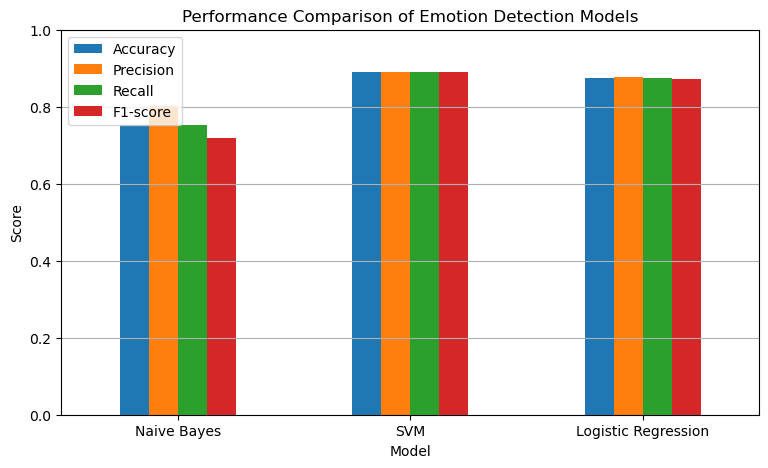

In [41]:


results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(9, 5)
)

plt.title("Performance Comparison of Emotion Detection Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


<h4>Confusion Matrix Visualization</h4>

In [43]:
def plot_confusion_matrix(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=le.classes_,
        yticklabels=le.classes_
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


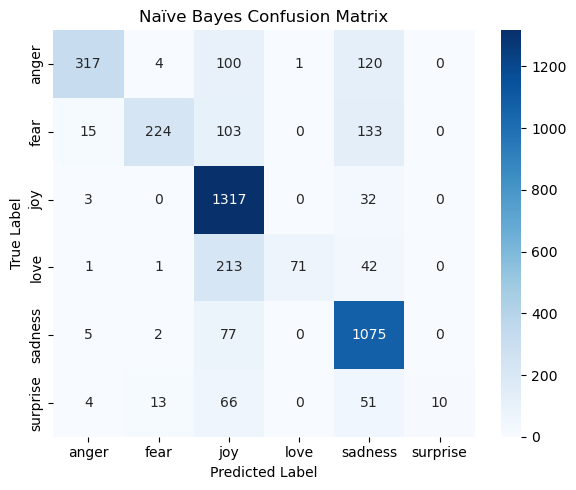

In [44]:
plot_confusion_matrix(nb, X_test_vec, y_test, "Naïve Bayes Confusion Matrix")


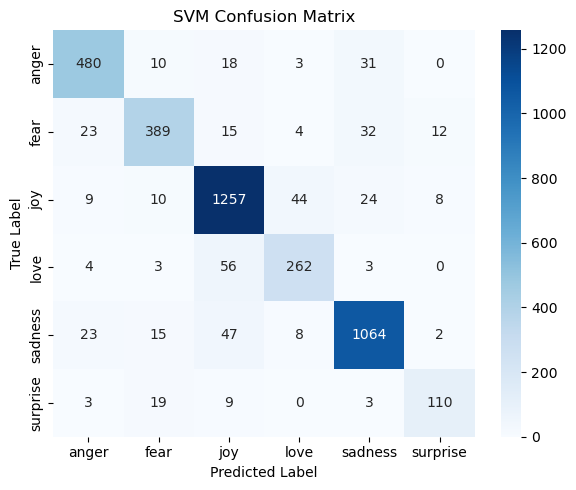

In [45]:
plot_confusion_matrix(svm, X_test_vec, y_test, "SVM Confusion Matrix")


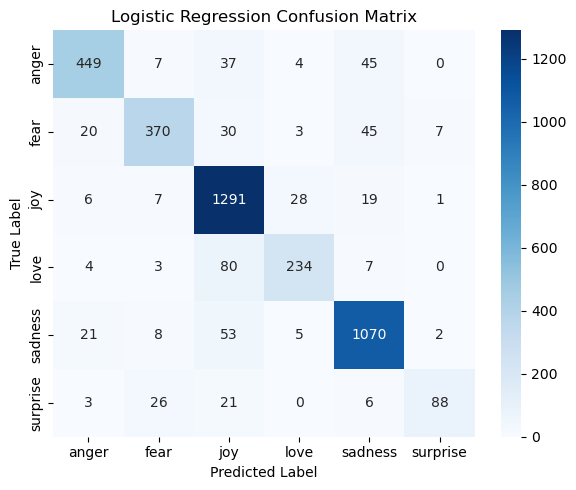

In [46]:
plot_confusion_matrix(lr, X_test_vec, y_test, "Logistic Regression Confusion Matrix")


<h4>Cross Validation Score</h4>

In [48]:
from sklearn.model_selection import cross_val_score


# Dictionary of models
models = {
    "Naive Bayes": nb,
    "SVM": svm,
    "Logistic Regression": lr
}

# Store CV scores
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_vec,
        y_train,
        cv=5,
        scoring="f1_weighted"
    )
    cv_scores[name] = scores
    print(f"{name} CV F1-score: {scores.mean():.4f} ± {scores.std():.4f}")


Naive Bayes CV F1-score: 0.7005 ± 0.0062
SVM CV F1-score: 0.8873 ± 0.0058
Logistic Regression CV F1-score: 0.8603 ± 0.0069


In [49]:
cv_df = pd.DataFrame(cv_scores)
cv_df


,Naive Bayes,SVM,Logistic Regression
0,0.692792,0.882606,0.851668
1,0.695707,0.887756,0.858058
2,0.710370,0.890153,0.865489
3,0.699816,0.879816,0.855354
4,0.704039,0.896299,0.870710


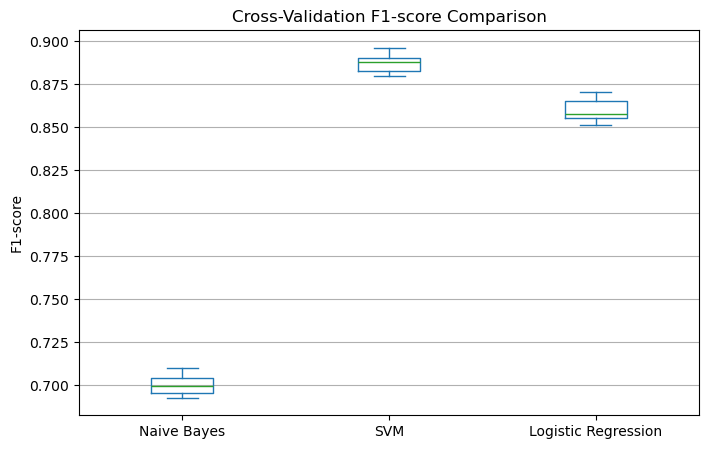

In [50]:


cv_df.plot(
    kind="box",
    figsize=(8, 5)
)

plt.title("Cross-Validation F1-score Comparison")
plt.ylabel("F1-score")
plt.grid(axis="y")
plt.show()


<h4>Hyperparameter tuning using GridSearchCV</h4>

<h5>Naive Bayes Tuning</h5>

In [53]:
from sklearn.model_selection import GridSearchCV

nb_params = {
    "alpha": [0.1, 0.5, 1.0]
}

nb_grid = GridSearchCV(
    MultinomialNB(),
    nb_params,
    cv=5,
    scoring="f1_weighted"
)

nb_grid.fit(X_train_vec, y_train)
best_nb = nb_grid.best_estimator_




Best Naive Bayes Params: {'alpha': 0.1}


In [54]:
lr_params = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear"]
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_params,
    cv=5,
    scoring="f1_weighted"
)

lr_grid.fit(X_train_vec, y_train)
best_lr = lr_grid.best_estimator_




Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}


In [55]:
svm_params = {
    "C": [0.1, 1, 10]
}

svm_grid = GridSearchCV(
    LinearSVC(),
    svm_params,
    cv=5,
    scoring="f1_weighted"
)

svm_grid.fit(X_train_vec, y_train)
best_svm = svm_grid.best_estimator_




Best SVM Params: {'C': 1}


In [109]:
print("Best Naive Bayes Params:", nb_grid.best_params_)
print("Best Logistic Regression Params:", lr_grid.best_params_)
print("Best SVM Params:", svm_grid.best_params_)

Best Naive Bayes Params: {'alpha': 0.1}
Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Best SVM Params: {'C': 1}


In [56]:
def overall_metrics_simple(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    return accuracy, precision, recall, f1


In [57]:

tuned_models = {
    "Naive Bayes": best_nb,
    "Logistic Regression": best_lr,    
    "SVM": best_svm
}

tuned_results = []

for name, model in tuned_models.items():
    acc, prec, rec, f1 = overall_metrics_simple(model, X_test_vec, y_test)
    tuned_results.append([name, acc, prec, rec, f1])

tuned_summary_df = pd.DataFrame(
    tuned_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

tuned_results_df = tuned_summary_df.round(4)
tuned_results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.7850,0.7965,0.7850,0.7709
1,Logistic Regression,0.8885,0.8879,0.8885,0.8877
2,SVM,0.8905,0.8900,0.8905,0.8900


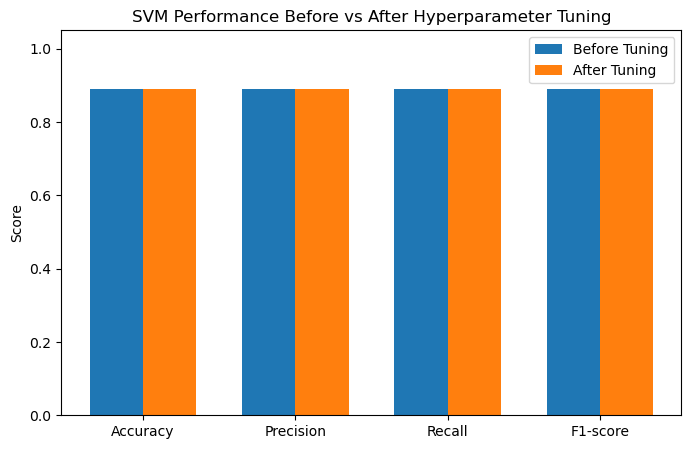

In [58]:


metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

before = results_df[results_df["Model"] == "SVM"][metrics].values.flatten()
after = tuned_results_df[tuned_results_df["Model"] == "SVM"][metrics].values.flatten()

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, before, width, label="Before Tuning")
plt.bar(x + width/2, after, width, label="After Tuning")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.title("SVM Performance Before vs After Hyperparameter Tuning")
plt.legend()

plt.show()


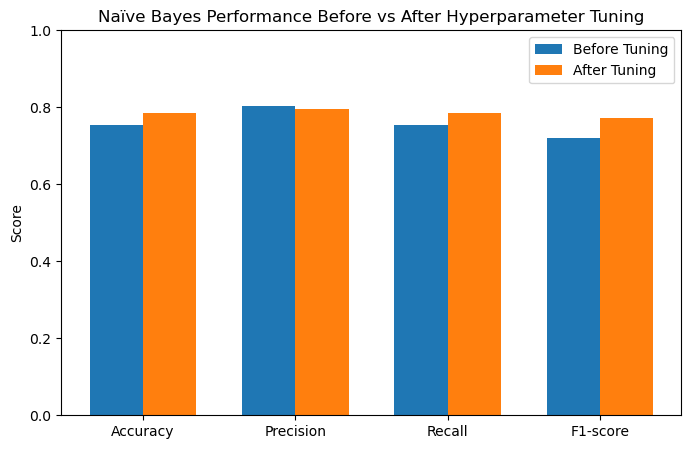

In [59]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

before_nb = results_df[results_df["Model"] == "Naive Bayes"][metrics].values.flatten()
after_nb = tuned_results_df[tuned_results_df["Model"] == "Naive Bayes"][metrics].values.flatten()

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, before_nb, width, label="Before Tuning")
plt.bar(x + width/2, after_nb, width, label="After Tuning")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Naïve Bayes Performance Before vs After Hyperparameter Tuning")
plt.legend()

plt.show()

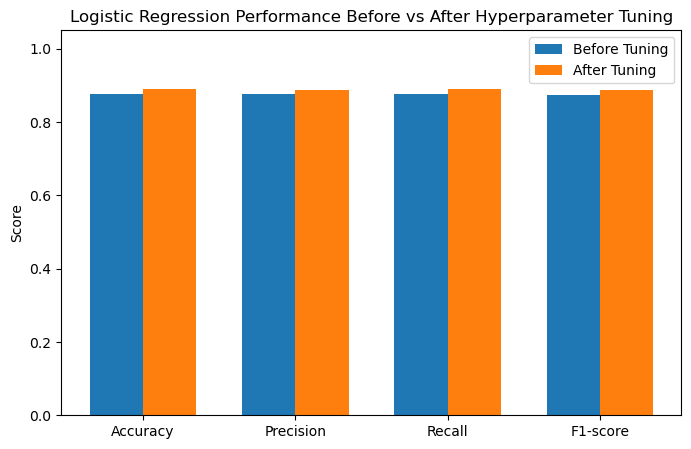

In [60]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

before_lr = results_df[results_df["Model"] == "Logistic Regression"][metrics].values.flatten()
after_lr = tuned_results_df[tuned_results_df["Model"] == "Logistic Regression"][metrics].values.flatten()

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, before_lr, width, label="Before Tuning")
plt.bar(x + width/2, after_lr, width, label="After Tuning")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Logistic Regression Performance Before vs After Hyperparameter Tuning")
plt.legend()

plt.show()
